<a href="https://colab.research.google.com/github/hosammhmahmoud/Financial-Derivatives/blob/main/Machine_learning_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#STEP 1: Instal AIF30 library and Fair learn and Import Adult, German Credit and compas data set 

!pip install 'aif360[LFR]'
!pip install fairlearn

In [ ]:
cd /usr/local/lib/python3.7/dist-packages/aif360/data/raw/adult

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test

In [ ]:
cd /usr/local/lib/python3.7/dist-packages/aif360/data/raw/german

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data-numeric
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.doc

In [ ]:
cd /usr/local/lib/python3.7/dist-packages/aif360/data/raw/bank

In [ ]:
cd /usr/local/lib/python3.7/dist-packages/aif360/data/raw/compas

In [ ]:
!wget https://raw.githubusercontent.com/propublica/compas-analysis/master/compas-scores-two-years.csv


In [9]:
#STEP 2: Import the AIF360 library and set the random seed.
import numpy as np
from aif360.datasets import AdultDataset, GermanDataset
from aif360.algorithms.preprocessing.optim_preproc_helpers.data_preproc_functions import load_preproc_data_adult, load_preproc_data_german, load_preproc_data_compas
from aif360.metrics import ClassificationMetric
from aif360.algorithms.preprocessing.reweighing import Reweighing
import pdb
from sklearn.preprocessing import StandardScaler  #MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import *
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
import pandas as pd
import matplotlib.pyplot as plt


np.random.seed(0)

In [22]:
### Question One: Implement Linear regression and Identify accurecy and fairness 

privileged_groups = [{'sex': 1}]
unprivileged_groups = [{'sex': 0}]

#Step A. Get the Data useing the Load_prproc function 

dataset_adult = load_preproc_data_adult(['sex'])
dataset_german = load_preproc_data_german(['sex'])
dataset_compas = load_preproc_data_compas(['sex'])

# Step B. Divide the data into train and test data with 70%, 30% respectively 

train_a , test_a = dataset_adult.split([0.7], shuffle=True)
train_g , test_g = dataset_german.split([0.7], shuffle=True)
train_c , test_c = dataset_compas.split([0.7], shuffle=True)

# Step C. Define a cross validation function using Linear regression

def val_score(train_data, C_lr=None, reweight = False):

        labels_ = []
        scores = []
        metrics = []
        data_m_ = []
        privileged_m_ = []
        unprivileged_m_ = []

        skf = StratifiedKFold(n_splits=5, random_state=7, shuffle=True)
        for train_index, test_index in skf.split( train_data[1].features, train_data[1].labels.ravel()) :

            train_cv = train_data[1].subset(train_index)  
            test_cv = train_data[1].subset(test_index)

            # Reweighting Effect 

            if reweight == True :
              train_cv = RW.fit_transform(train_cv)
              #print("subgroup weights", np.unique(train_cv.instance_weights))
              
            x_train = train_cv.features
            y_train = train_cv.labels.ravel()

            clf = make_pipeline( StandardScaler(), LogisticRegression(C= C_lr, max_iter=1000, verbose=1, solver="liblinear"))
            
            clf.fit( x_train, y_train , logisticregression__sample_weight= train_cv.instance_weights)
            score = clf.score(test_cv.features, test_cv.labels.ravel())
            
            labels = clf.predict(test_cv.features)
            y_pred = labels
            test_pred = test_cv.copy()

            if len(y_pred.shape) < 2:
                y_pred = y_pred.reshape(len(y_pred), 1)
                
            test_pred.labels = y_pred
            metric_ = ClassificationMetric(test_cv,test_pred, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
            metric = metric_.equal_opportunity_difference()

            scores.append(score)
            metrics.append(metric)

            return np.mean(scores), np.mean(metrics) , train_data[0]

# Step D. Calculate the score and accuracy for the train data sets for Adult, German and compas data 

mydata = [["Adult Train set", train_a], ['German Credit Train set', train_g], ['Compas Train set', train_c ] , 
               ["Adult Test set",test_a], ['German Credit Test set', test_g ], [ 'Compas Test set', test_c ]] 

data_ =[]
for i in mydata : 
    C_lr = 0.0000001
    for j in range(10) : 
       C_lr = C_lr* 10
       score, metrics , val = val_score(i, C_lr = C_lr) 
       data = [val, C_lr, score, metrics]
       data_.append(data)

df = pd.DataFrame(data_, columns = ['Dataset', 'Learning_Rate', 'Accurecy', 'Fairness'])
#df.head()

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

For Adult Train set Best LR for Accurecy = 0.001 with Accurcey of 0.8038900263234864
For Adult Train set Best LR for Fairness = 1e-06 with Fairness of -0.2813655036365016
For German Credit Train set Best LR for Accurecy = 0.01 with Accurcey of 0.6857142857142857
For German Credit Train set Best LR for Fairness = 1e-06 with Fairness of -0.14761904761904765
For Compas Train set Best LR for Accurecy = 0.001 with Accurcey of 0.6792963464140731
For Compas Train set Best LR for Fairness = 0.01 with Fairness of -0.10640343093759241


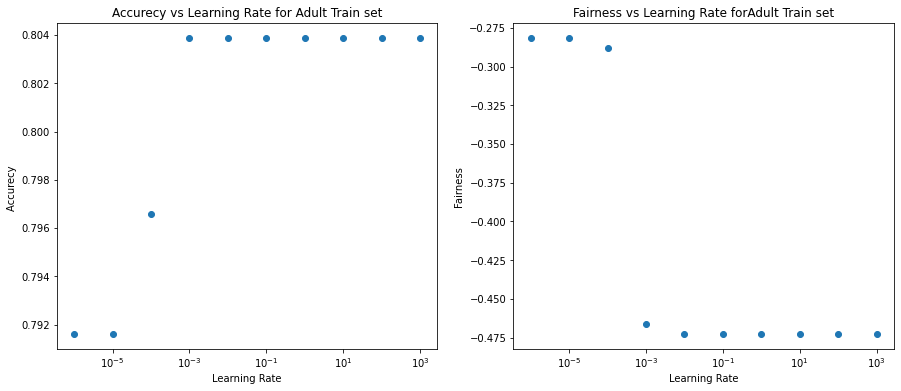

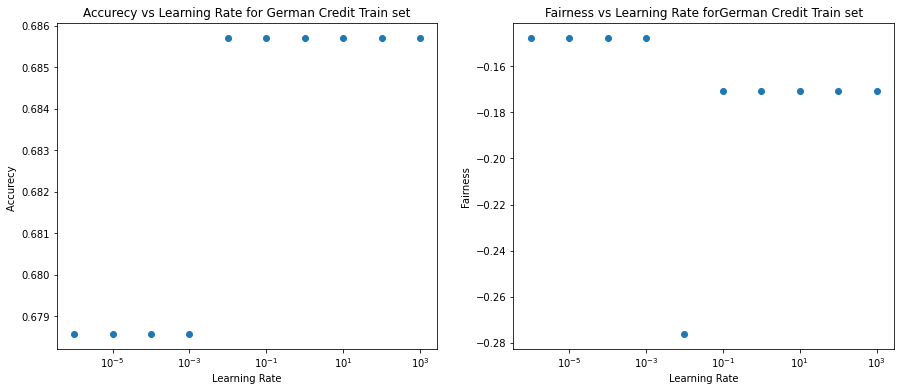

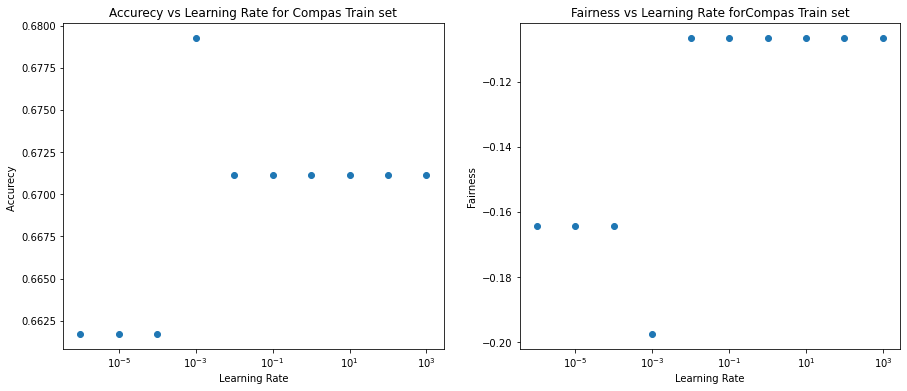

In [11]:
# Step E: Visualize and explain the data

def visualize(dataset,df):

    df_new = df.loc[df.Dataset == dataset]
    fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,6))
    ax1.scatter([i for i in df_new['Learning_Rate']], [i for i in df_new['Accurecy']])
    ax1.set_xscale('log')
    ax1.set_xlabel('Learning Rate')
    ax1.set_ylabel('Accurecy ')
    ax1.set_title('Accurecy vs Learning Rate for '+dataset)

    ax2.scatter([i for i in df_new['Learning_Rate']], [i for i in df_new['Fairness']])
    ax2.set_xscale('log')
    ax2.set_xlabel('Learning Rate')
    ax2.set_ylabel('Fairness ')
    ax2.set_title('Fairness vs Learning Rate for' + dataset)

visualize('Adult Train set' ,df)
visualize('German Credit Train set', df)
visualize('Compas Train set', df)

# Step F. Identify Best Accuracy and Best fairness model 

def results(dataset, df) : 

    df_new = df.loc[df.Dataset == dataset]

    Best_lr_acc = df_new['Learning_Rate'].loc[(df_new.Accurecy == df_new.Accurecy.max())]
    Best_lr_fair = df_new['Learning_Rate'].loc[(df_new.Fairness == df_new.Fairness.max())]

    acc_lr = df_new['Accurecy'].loc[(df_new.Learning_Rate == Best_lr_acc.iloc[0])] 
    fair_lr = df_new['Fairness'].loc[(df_new.Learning_Rate == Best_lr_fair.iloc[0])] 

    print('For', dataset, 'Best LR for Accurecy =', Best_lr_acc.iloc[0], 'with Accurcey of', acc_lr.iloc[0])
    print('For', dataset, 'Best LR for Fairness =', Best_lr_fair.iloc[0], 'with Fairness of', fair_lr.iloc[0])

    return Best_lr_acc.iloc[0] , Best_lr_fair.iloc[0]

model1_a , model2_a = results('Adult Train set', df)
model1_g , model2_g =  results('German Credit Train set',df)
model1_c , model2_c =  results('Compas Train set',df)


In [17]:
##Step G. Testing the results on our test dataset 

def test(data,lr, reweight = False) : 
      if reweight == True: 
              score, metrics , val = val_score(data, C_lr = lr, reweight = True ) 
      else :
              score, metrics , val = val_score(data, C_lr = lr ) 
      print('For', val, 'The Accurecy is', score, 'The fairness is', metrics )

test(mydata[3],model1_a)
test(mydata[3],model2_a)
test(mydata[4],model1_g)
test(mydata[4],model2_g)
test(mydata[5],model1_c)
test(mydata[5],model2_c)

[LibLinear]For Adult Test set The Accurecy is 0.8065506653019447 The fairness is -0.4377104377104377
[LibLinear]For Adult Test set The Accurecy is 0.8000682360968953 The fairness is -0.294544080258366
[LibLinear]For German Credit Test set The Accurecy is 0.7 The fairness is 0.1333333333333333
[LibLinear]For German Credit Test set The Accurecy is 0.65 The fairness is 0.33333333333333337
[LibLinear]For Compas Test set The Accurecy is 0.61198738170347 The fairness is -0.24492920015308073
[LibLinear]For Compas Test set The Accurecy is 0.6151419558359621 The fairness is -0.2011098354381936


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]For Adult 

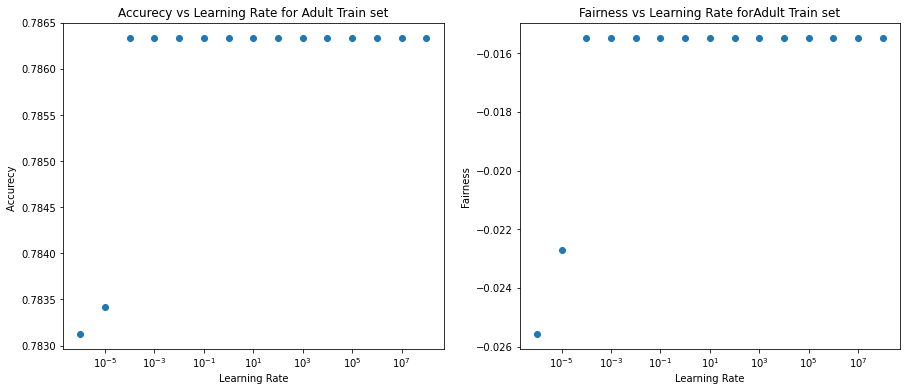

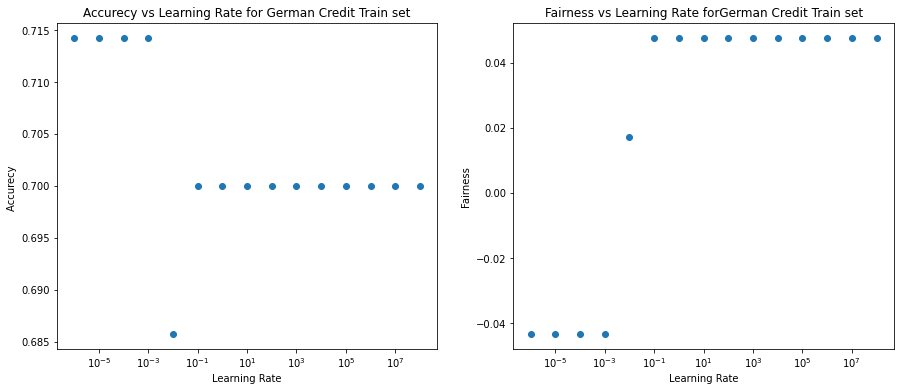

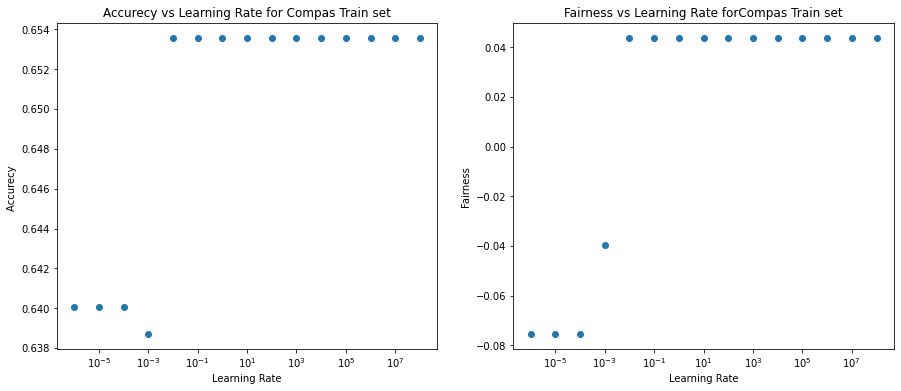

In [23]:
# Question 2: Implement reweightining to avoide baise and see the effect on accurancy and baise

# Step H: Implement the reweightenr and run the model

RW = Reweighing(unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)

data_ = []
for i in mydata: 
  C_lr = 0.0000001
  for j in range(15) : 
       C_lr = C_lr*10
       score, metrics, val= val_score(i, C_lr = C_lr, reweight = True) 
       data = [val, C_lr, score, metrics]
       data_.append(data)

df_reweight = pd.DataFrame(data_, columns = ['Dataset', 'Learning_Rate', 'Accurecy', 'Fairness'])

# Step I: Visualize the data and obtain the best fairneee and bla bla blaaaa????????????????

visualize('Adult Train set', df_reweight)
visualize('German Credit Train set', df_reweight)
visualize('Compas Train set', df_reweight)

model3_a , model4_a = results('Adult Train set', df_reweight)
model3_g , model4_g = results('German Credit Train set',df_reweight)
model3_c , model4_c = results('Compas Train set',df_reweight)

# Step J : Test the results on test Data sets 

test(mydata[3],model3_a, reweight = True )
test(mydata[3],model4_a, reweight = True )
test(mydata[4],model3_g, reweight = True )
test(mydata[4],model4_g, reweight = True )
test(mydata[5],model3_c, reweight = True )
test(mydata[5],model4_c, reweight = True )

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



For Adult Train set Best LR = 1e-06 with Accurcey of 0.7916057326703715 and fairness of -0.2813655036365016

For German Credit Train set Best LR = 1e-06 with Accurcey of 0.6785714285714286 and fairness of -0.14761904761904765

For Compas Test set Best LR = 0.1 with Accurcey of 0.6151419558359621 and fairness of -0.13069269039418285


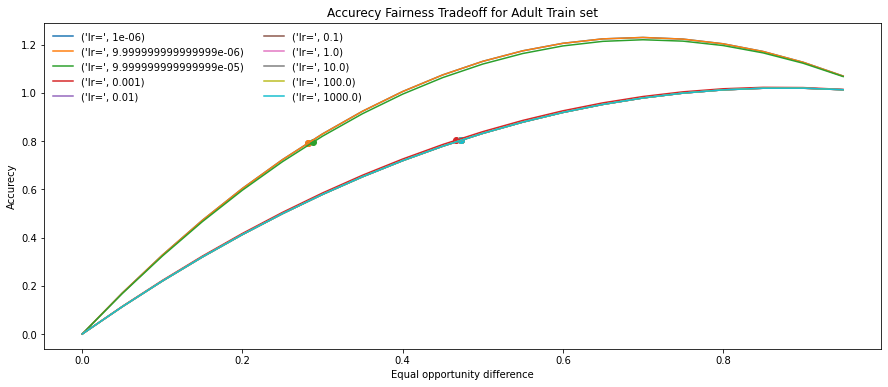

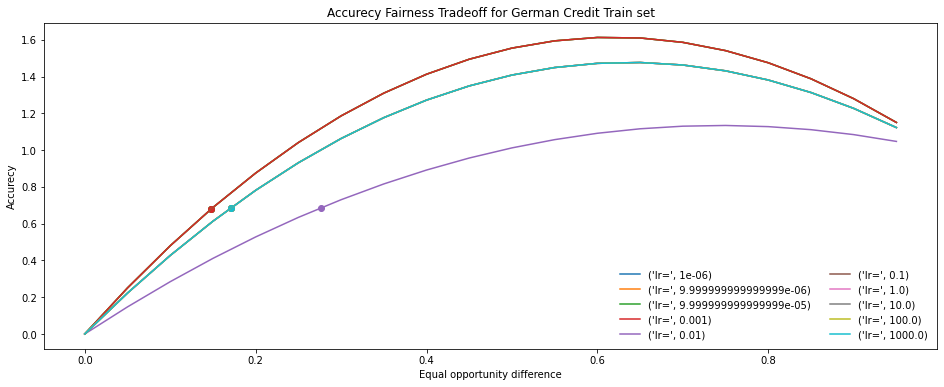

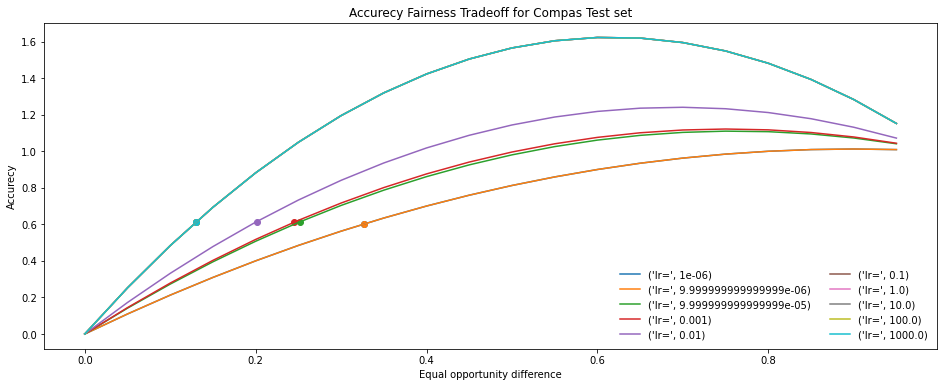

In [14]:
#Question Three

# Step K: AUC: Increasing Accurecy, decreasing Equal Oppotunity difference 

data_ =[]
for i in mydata : 
    C_lr = 0.0000001
    for j in range(10) : 
       C_lr = C_lr* 10
       score, metrics , val = val_score(i, C_lr = C_lr) 
       data = [val, C_lr, score, metrics, 0 ]
       data_.append(data)

df = pd.DataFrame(data_, columns = ['Dataset', 'Learning_Rate', 'Accurecy', 'Fairness',  'AUC'])
df.head()


#plotting and AUM calculations 

def plot_curve(x,y) : 
  curve = np.polyfit(x,y,2)
  poly = np.poly1d(curve) 
  new_x = [ ]
  new_y = [ ]
  for i in range(0,20) : 
    new_x.append(i/20)
    calc = poly(i/20)
    new_y.append(calc) 
  # plt.plot(new_x, new_y)
  # plt.show  
  return new_x, new_y, np.trapz(new_y,new_x)


# Step L : Caclulating AUC and choosing the best model 

def results_3(dataset, df) :  
  
  df_new = df[df.Dataset == dataset]
  
  for i in df_new.index  : 
      x = [0, abs(df_new['Fairness' ][i]) , 1 ]
      y = [0, df_new['Accurecy'][i] , 1]
      x,y,area = plot_curve(x,y)
      df_new.loc[i,'AUC'] = area
      plt.plot(x,y, label = ('lr=',df_new['Learning_Rate'][i]))
      plt.xlabel('Equal opportunity difference')
      plt.ylabel('Accurecy')
      plt.title('Accurecy Fairness Tradeoff for '+ dataset)
      plt.legend(frameon=False, ncol = 2)
      plt.scatter(abs(df_new['Fairness' ][i]) ,  df_new['Accurecy'][i])

  best_lr = df_new['Learning_Rate'].loc[(df_new.AUC == df_new.AUC.max())]

  acc_lr = df_new['Accurecy'].loc[(df_new.Learning_Rate == best_lr.iloc[0])] 
  fair_lr = df_new['Fairness'].loc[(df_new.Learning_Rate == best_lr.iloc[0])] 
  print()
  print('For', dataset, 'Best LR =', best_lr.iloc[0], 'with Accurcey of', acc_lr.iloc[0],'and fairness of', fair_lr.iloc[0] )

  return best_lr.iloc[0]
plt.figure(figsize = (15,6))
model5_a = results_3('Adult Train set', df)
plt.figure(figsize = (16,6))
model5_g = results_3('German Credit Train set', df)
plt.figure(figsize = (16,6))
model5_c = results_3('Compas Test set', df)  

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]
For Adult Train set Best LR = 9.999999999999999e-05 with Accurcey of 0.7863410353904651 and fairness of -0.015472231081142651

For German Credit Train set Best LR = 0.01 with Accurcey of 0.6857142857142857 and fairness of 0.017316017316017396



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



For Compas Test set Best LR = 1e-06 with Accurcey of 0.6214511041009464 and fairness of -0.02010582010582007


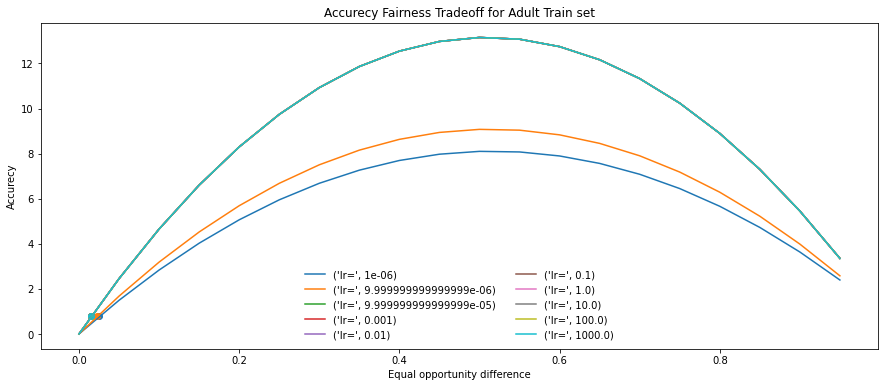

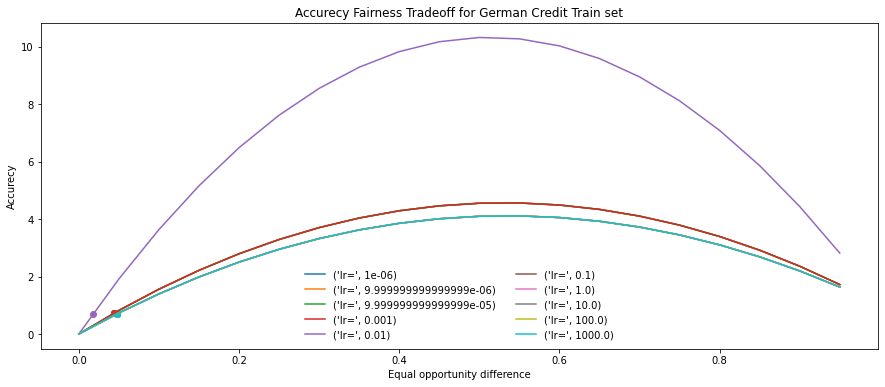

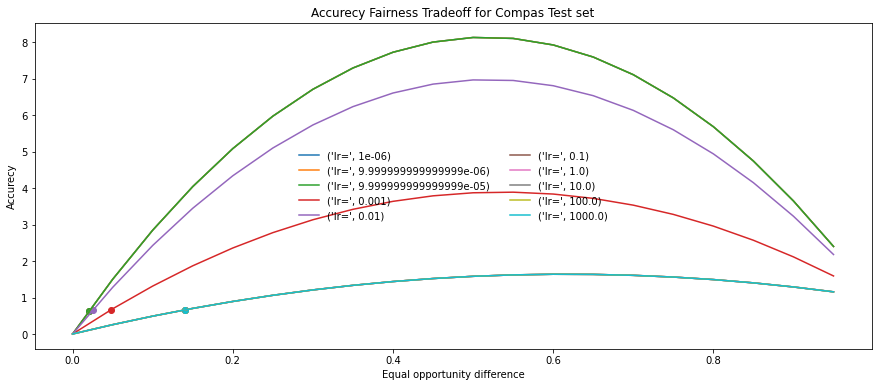

In [24]:
# Step M: Using the reweighting and calculating Best learning rate

data_ =[]
for i in mydata : 
    C_lr = 0.0000001
    for j in range(10) : 
       C_lr = C_lr* 10
       score, metrics , val = val_score(i, C_lr = C_lr, reweight = True ) 
       data = [val, C_lr, score, metrics, 0 ]
       data_.append(data)

df = pd.DataFrame(data_, columns = ['Dataset', 'Learning_Rate', 'Accurecy', 'Fairness', 'AUC'])
df.head()

plt.figure(figsize = (15,6))
model6_a = results_3('Adult Train set', df)
plt.figure(figsize = (15,6))
model6_g = results_3('German Credit Train set', df)
plt.figure(figsize = (15,6))
model6_c = results_3('Compas Test set', df)

# Step N: Test the models on test data set 

# test(mydata[3],model5_a)
# test(mydata[3],model6_a)
# test(mydata[4],model5_g)
# test(mydata[4],model6_g)
# test(mydata[5],model5_c)
# test(mydata[5],model6_c)
